# **Multiple Linear Regression Model for predicting City Miles-Per-Gallon**

Load the Dataset

In [ ]:
import pandas as pd
df=pd.read_csv("cars.csv")
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [ ]:
df.columns

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Hybrid',
       'Engine Information.Number of Forward Gears',
       'Engine Information.Transmission', 'Fuel Information.City mpg',
       'Fuel Information.Fuel Type', 'Fuel Information.Highway mpg',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')

Updating Column names for Better Handling

In [ ]:
df.rename(columns={
    'Dimensions.Height': 'Height',
    'Dimensions.Length': 'Length',
    'Dimensions.Width': 'Width',
    'Engine Information.Driveline': 'Driveline',
    'Engine Information.Engine Type': 'Engine_Type',
    'Engine Information.Hybrid': 'Hybrid',
    'Engine Information.Number of Forward Gears': 'Forward_Gears',
    'Engine Information.Transmission': 'Transmission',
    'Fuel Information.City mpg': 'City_MPG',
    'Fuel Information.Fuel Type': 'Fuel_Type',
    'Fuel Information.Highway mpg': 'Highway_MPG',
    'Identification.Classification': 'Classification',
    'Identification.ID': 'ID',
    'Identification.Make': 'Make',
    'Identification.Model Year': 'Model_Year',
    'Identification.Year': 'Year',
    'Engine Information.Engine Statistics.Horsepower': 'Horsepower',
    'Engine Information.Engine Statistics.Torque': 'Torque'
}, inplace=True)


In [ ]:
df.columns

Index(['Height', 'Length', 'Width', 'Driveline', 'Engine_Type', 'Hybrid',
       'Forward_Gears', 'Transmission', 'City_MPG', 'Fuel_Type', 'Highway_MPG',
       'Classification', 'ID', 'Make', 'Model_Year', 'Year', 'Horsepower',
       'Torque'],
      dtype='object')

Duplicates Removal

In [ ]:
df=df.drop_duplicates()

Unwanted columns Removal

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Engine_Type', 'Transmission', 'Classification', 'ID', 'Make', 'Model_Year', 'Year'])

# Display the updated DataFrame
df.head()


,Height,Length,Width,Driveline,Hybrid,Forward_Gears,City_MPG,Fuel_Type,Highway_MPG,Horsepower,Torque
0,140,143,202,All-wheel drive,True,6,18,Gasoline,25,250,236
1,140,143,202,Front-wheel drive,True,6,22,Gasoline,28,200,207
2,140,143,202,Front-wheel drive,True,6,21,Gasoline,30,200,207
3,140,143,202,All-wheel drive,True,6,21,Gasoline,28,200,207
5,91,17,62,All-wheel drive,True,6,16,Gasoline,27,265,243


In [ ]:
df.columns


Index(['Height', 'Length', 'Width', 'Driveline', 'Hybrid', 'Forward_Gears',
       'City_MPG', 'Fuel_Type', 'Highway_MPG', 'Horsepower', 'Torque'],
      dtype='object')

Encoding Driveline and Fuel_Type

In [ ]:
df=pd.get_dummies(df, columns=['Driveline', 'Fuel_Type'], drop_first=True)


# **Correlation Analysis and VIF score**

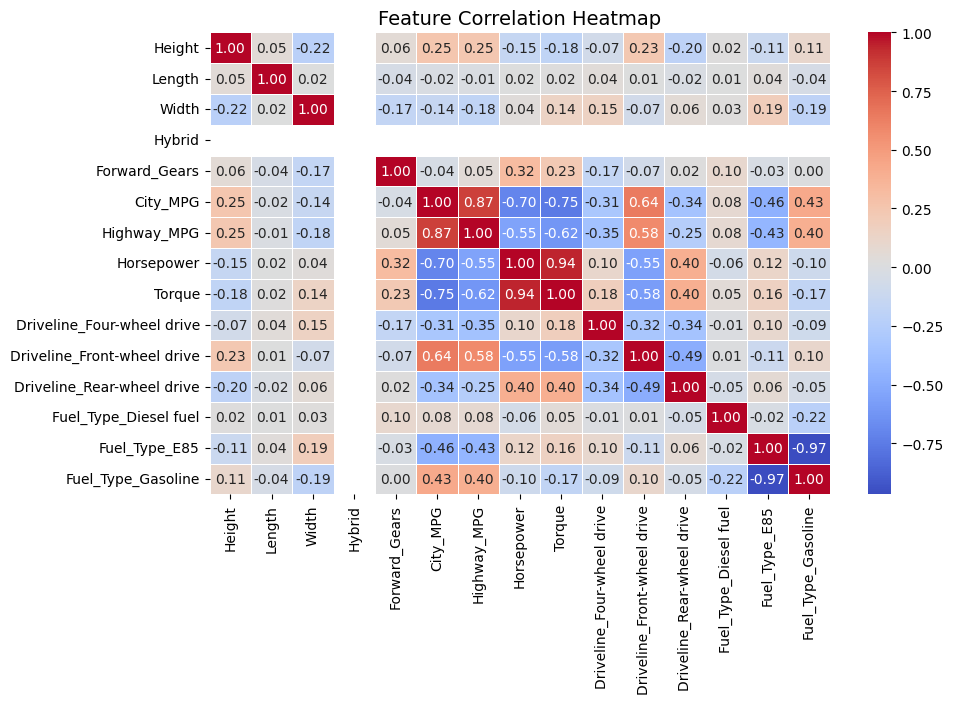

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()


In [ ]:
print(df)

      Height  Length  Width  Hybrid  Forward_Gears  City_MPG  Highway_MPG  \
0        140     143    202    True              6        18           25   
1        140     143    202    True              6        22           28   
2        140     143    202    True              6        21           30   
3        140     143    202    True              6        21           28   
5         91      17     62    True              6        16           27   
...      ...     ...    ...     ...            ...       ...          ...   
5071      13     253    201    True              5        18           25   
5072     141     249    108    True              6        12           20   
5073     160     249    108    True              6        12           20   
5074     200     210    110    True              6        17           25   
5075     200      94    110    True              6        17           25   

      Horsepower  Torque  Driveline_Four-wheel drive  \
0            250   

***Model Training and Evaluation***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# Splitting dataset into features (X) and target variable (y)
X = df.drop(columns=['City_MPG'])  # Independent variables (Driveline & Fuel_Type)
y = df['City_MPG']                 # Dependent variable (City MPG)

# Splitting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the MLR model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display model performance
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)



R² Score: 0.8894
Mean Absolute Error (MAE): 1.08
Mean Squared Error (MSE): 2.32
Root Mean Squared Error (RMSE): 1.52

Model Coefficients:
                        Feature   Coefficient
0                        Height  1.909114e-03
1                        Length  8.354752e-05
2                         Width  2.749044e-03
3                        Hybrid  1.554312e-15
4                 Forward_Gears  1.855124e-01
5                   Highway_MPG  2.933648e-01
6                    Horsepower -2.992535e-03
7                        Torque -1.439551e-02
8    Driveline_Four-wheel drive -4.547150e-01
9   Driveline_Front-wheel drive  1.336630e+00
10   Driveline_Rear-wheel drive -4.096959e-02
11        Fuel_Type_Diesel fuel  3.980746e+00
12                Fuel_Type_E85 -2.214820e+00
13           Fuel_Type_Gasoline  9.934718e-01


## **Outlier Removed**

In [ ]:
# Calculate the IQR for each numeric column
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only the rows within the bounds
df_no_outliers = df[~((df.select_dtypes(include=[np.number]) < lower_bound) | (df.select_dtypes(include=[np.number]) > upper_bound)).any(axis=1)]

# Display the new DataFrame without outliers
print(df_no_outliers)


      Height  Length  Width  Hybrid  Forward_Gears  City_MPG  Highway_MPG  \
0        140     143    202    True              6        18           25   
1        140     143    202    True              6        22           28   
2        140     143    202    True              6        21           30   
3        140     143    202    True              6        21           28   
5         91      17     62    True              6        16           27   
...      ...     ...    ...     ...            ...       ...          ...   
5069       3     253    201    True              5        18           25   
5070       3     253    201    True              5        17           24   
5071      13     253    201    True              5        18           25   
5074     200     210    110    True              6        17           25   
5075     200      94    110    True              6        17           25   

      Horsepower  Torque  Driveline_Four-wheel drive  \
0            250   

**Training, Tesing and Evaluation after Outlier Removal**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# Splitting dataset into features (X) and target variable (y)
X = df_no_outliers.drop(columns=['City_MPG'])  # Independent variables (Driveline & Fuel_Type)
y = df_no_outliers['City_MPG']                 # Dependent variable (City MPG)

# Splitting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the MLR model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display model performance
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)



R² Score: 0.9412
Mean Absolute Error (MAE): 0.78
Mean Squared Error (MSE): 1.10
Root Mean Squared Error (RMSE): 1.05

Model Coefficients:
                        Feature   Coefficient
0                        Height -5.107589e-04
1                        Length -9.194662e-05
2                         Width  3.027810e-03
3                        Hybrid -2.109424e-15
4                 Forward_Gears -1.829764e-01
5                   Highway_MPG  6.176800e-01
6                    Horsepower -5.711648e-03
7                        Torque -4.107385e-03
8    Driveline_Four-wheel drive  9.359197e-02
9   Driveline_Front-wheel drive -9.815332e-02
10   Driveline_Rear-wheel drive -2.391968e-01
11        Fuel_Type_Diesel fuel  3.037458e+00
12                Fuel_Type_E85  1.612981e+00
13           Fuel_Type_Gasoline  2.521934e+00


# **Actual vs Predicted Highway MPG**

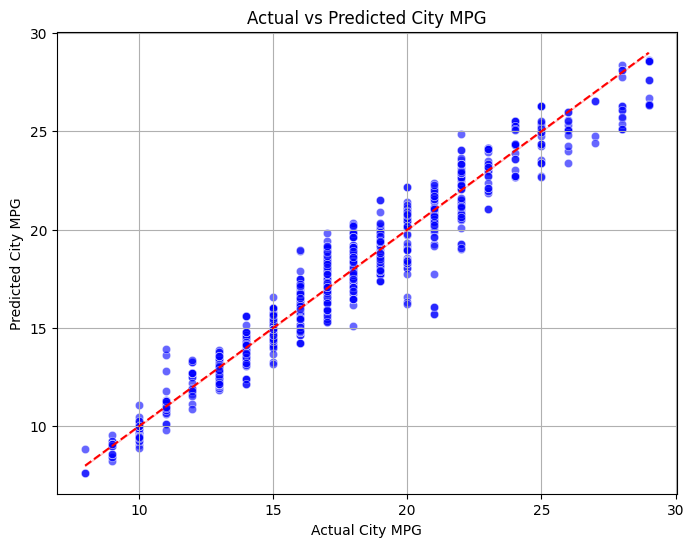

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='dashed')  # Perfect fit line

# Labels and title
plt.xlabel("Actual City MPG")
plt.ylabel("Predicted City MPG")
plt.title("Actual vs Predicted City MPG")
plt.grid(True)

# Show plot
plt.show()
